In [6]:
import pandas as pd
import numpy as np
from scipy.stats import bootstrap



In [7]:
df = pd.read_csv("Gnut_correlation.csv" , delimiter=',')
df

,gen,CORR
0,RIL_S23,-0.992987
1,RIL_S24,-0.999294
2,F2,-0.992704
3,F2,-0.976083
4,F2,-0.998211


<Axes: ylabel='Frequency'>

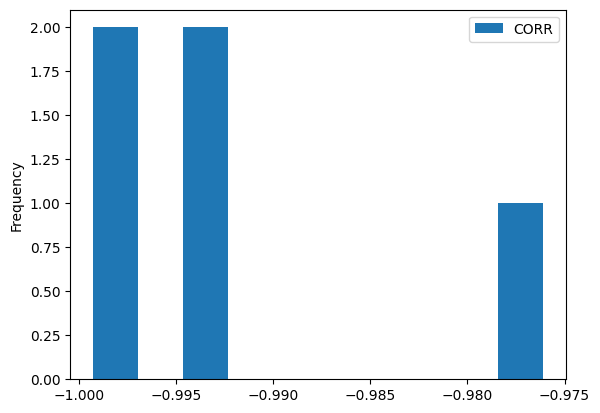

In [8]:
df.plot(kind='hist')

In [9]:
ar = np.array(df['CORR'])
ar

array([-0.99298724, -0.99929408, -0.99270378, -0.97608324, -0.99821123])

In [10]:
def statistics(data):
    return np.mean(data)

res = bootstrap((ar,),statistics ,n_resamples = 1000,confidence_level=0.95 )

In [11]:
print("Bootstrap estimate of the mean:", res.confidence_interval)
print("Confidence interval:", res.confidence_interval)
print("Standard error:", res.standard_error)

Bootstrap estimate of the mean: ConfidenceInterval(low=-0.9967713438000001, high=-0.9806148835051697)
Confidence interval: ConfidenceInterval(low=-0.9967713438000001, high=-0.9806148835051697)
Standard error: 0.0036942322796480135


In [12]:
import matplotlib.pyplot as plt

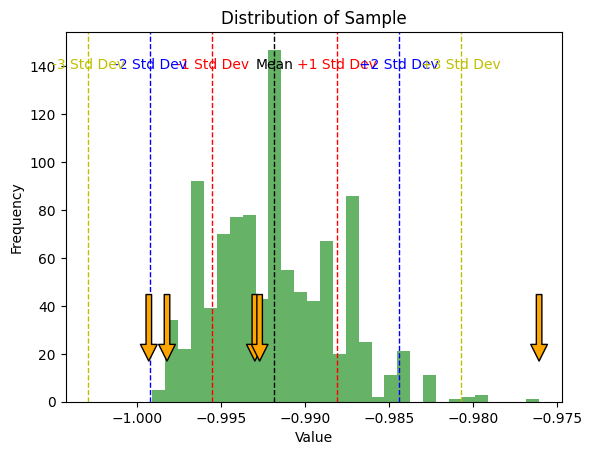

In [14]:
data = res.bootstrap_distribution
mean = np.mean(data)
std_dev = np.std(data)

# Plot the histogram
plt.hist(data, bins=30, alpha=0.6, color='g')

# Add vertical lines for the mean and standard deviations
plt.axvline(mean, color='k', linestyle='dashed', linewidth=1)
plt.axvline(mean + std_dev, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean - std_dev, color='r', linestyle='dashed', linewidth=1)
plt.axvline(mean + 2*std_dev, color='b', linestyle='dashed', linewidth=1)
plt.axvline(mean - 2*std_dev, color='b', linestyle='dashed', linewidth=1)
plt.axvline(mean + 3*std_dev, color='y', linestyle='dashed', linewidth=1)
plt.axvline(mean - 3*std_dev, color='y', linestyle='dashed', linewidth=1)

for p in ar:
    plt.annotate('', xy=(p, plt.ylim()[1]*0.1), xytext=(p, plt.ylim()[1]*0.3),
                 arrowprops=dict(facecolor='orange', shrink=0.05))

# Add text annotations for the standard deviations
plt.text(mean, plt.ylim()[1]*0.9, 'Mean', horizontalalignment='center', color='k')
plt.text(mean + std_dev, plt.ylim()[1]*0.9, '+1 Std Dev', horizontalalignment='center', color='r')
plt.text(mean - std_dev, plt.ylim()[1]*0.9, '-1 Std Dev', horizontalalignment='center', color='r')
plt.text(mean + 2*std_dev, plt.ylim()[1]*0.9, '+2 Std Dev', horizontalalignment='center', color='b')
plt.text(mean - 2*std_dev, plt.ylim()[1]*0.9, '-2 Std Dev', horizontalalignment='center', color='b')
plt.text(mean + 3*std_dev, plt.ylim()[1]*0.9, '+3 Std Dev', horizontalalignment='center', color='y')
plt.text(mean - 3*std_dev, plt.ylim()[1]*0.9, '-3 Std Dev', horizontalalignment='center', color='y')

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Sample')

# Show the plot
plt.show()
